<a href="https://colab.research.google.com/github/Nicolaser1102/Introduccion_Machine_Learning/blob/main/Tareas_Week5/Formulas_m%C3%A9tricas_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:1/2/2022
## Fecha de actualización: 2/2/2022
## Esteban Simbaña

#Formulas métricas de regresión 

1.   Error absoluto medio (MAE)
2.   Error cuadrático medio (MSE)
3.   Raíz del error cuadrático medio (MSE)



#Regresión lineal 

 Nota: Se importó el código de la plataforma Coding Dojo para obtener los valores:

-  Largo de los valores predichos
-  Valores reales de la columna vector objetivo
-  Valores predichos
-  Valor r2

## Código para obtener una regresión lineal sobre la columna 'price' en el dataset 'modifiedBostonHousing'

Link descarga dataframe: https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/modifiedBostonHousing.csv

In [63]:
#Se montan los datos 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#Se importan las librerías que ocuparemos 

import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [74]:
#Obtenemos el df
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week 1 - Track2/Deberes /Formulas_metricas_de_regresion /modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
#verificamos la dimensión del df 
df.shape #tiene un total de 506 filas y 14 columnas

(506, 14)

In [76]:
# obteniendo las columna que vamos a utilizar para la regresión lineal
df = df.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


Analisis exploratorio de datos 


In [77]:
# Verificamos valores faltantes
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [78]:
# Eliminar filas enteras del marco de datos si contienen nans o 'any'
df = df.dropna(how = 'any')

In [79]:
# No hay más valores perdidos
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [80]:
df.shape #nueva dimensión del df 

(505, 4)

In [81]:
#se eliminan precios negativos
priceFilter = df.loc[:, 'price'] < 0 
df = df.loc[~priceFilter, :]

In [82]:
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [83]:
# matriz de características (debe ser una matriz NumPy)
# se convierten los valores de las columnas en formato numpy
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [84]:
y = df.loc[:, 'price'].values #se convierte los valores del vector objetivo en formato numpy

Regresion linear

In [85]:
reg = LinearRegression(fit_intercept=True) #se realiza una instancia de la clase 

In [86]:
reg.fit(X,y) # se entrena al modelo

LinearRegression()

In [87]:
reg.predict(X[0].reshape(-1,3)) #obtenermos el valor predictivo de la fila [0] ademas de acomodar 
                                #la matriz a 3 columnas y # de filas dadas por python 

array([30.93692265])

In [89]:
reg.predict(X[0:10]) #se verfica los 11 primeros valores predichos

array([30.93692265, 25.54732909, 32.87840913, 31.22126902, 31.14158522,
       26.45245446, 23.99307176, 22.0562208 , 13.67300117, 21.85868698])

## R2

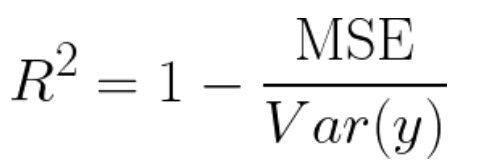

In [90]:
#Se mide el desempeño del modelo, en este caso 'reg.score' nos da el valor de R2
# R2 = Suma de los errores al cuadrado

score = reg.score(X, y)
print(score)

0.7848414273030438


In [111]:
#redondeamos el valor
round(score,2)

0.78

El R2 score interpretamos como: 
El 78% de la variación del precio de las casas puede ser explicado por "RM","LSTAT" y "PTRATIO"

#Métricas de regresión

##Tarea

- Calcular el el error absoluto medio (MAE), error cuadrático medio (MSE), y la raíz del error cuadrático medio (RMSE) para el conjunto de datos y modelo de la sección de regresión lineal.


  # Error absoluto medio (MAE): media del valor absoluto de los errores.
  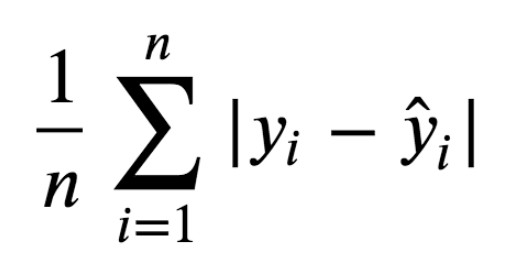

- Se obtiene el valor de 'n' que es el rango donde se hará la sumatoria de los valores

In [101]:
#de cuantos valores se hicieron predicciones (n) 
n = len(reg.predict(X[0:]))
n = float (n)
n

404.0

- Se obtiene los valores 'y' predichos por el modelo

In [95]:
#predecimos todos los valores de y según las características previamente entrenadas
array_predicted = reg.predict(X[0:])  # yi prima 

In [96]:
#estos serán los valores reales en y = y[0:]
y[0:10] #yi

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

- Sumatoria de los valores según la condición de: 
    - (yi (valor real) - yi prima (valor predicho)
     
    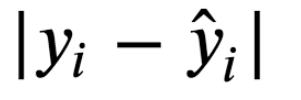

In [99]:
#sumatoria, del valor absoluto de la suma entre el valor real y el valor predicho 
numeros_sumados = 0 #variable que sumará cada una de las comparaciones 

n = int (n) # se convierte en 'int' al largo de la lista para que pueda ser iterada 

for i in range (0,n,1):
  numero_suma = abs(y [i]- array_predicted[i]) #se le aplica también el valor absoluto
  numeros_sumados = numeros_sumados+ numero_suma 

print (numeros_sumados)


1305.467776194265


In [100]:
# finalmente acabamos con la fórmula = 1/n por la sumatoria del valor absoluto de los errores
#error absoluto medio = 'MAE'
MAE = 1/n*(numeros_sumados)
MAE

3.231355881668973

In [108]:
#redondeamos el resultado 
round(MAE,2)

3.23

# Error cuadrático medio (MSE): Media de los errores cuadráticos
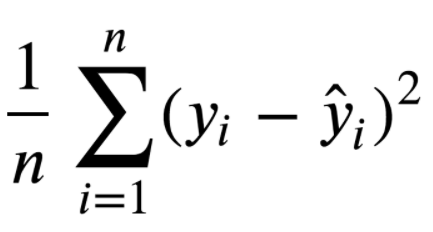

- **n es la misma (404)**

- Sumatoria de los valores según la condición de: 
    - (yi (valor real) - yi prima (valor predicho) al cuadrado

    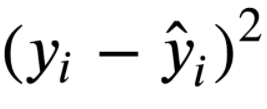

In [103]:
#modificamos nuestra condición de sumatoria en: "(y real-y predicha) al cuadrado"

n_mse = int (n) # convertimos en 'int' a n para que se pueda iterar
numeros_sumados_mse = 0
for i in range (0,n_mse,1):
  numero_suma_mse = pow((y [i]- array_predicted[i]),2) #(y real-y predicha) al cuadrado
  numeros_sumados_mse = numeros_sumados_mse+ numero_suma_mse

print (numeros_sumados_mse)

7237.8568592052425


In [104]:
# finalmente acabamos con la fórmula = 1/n por la sumatoria los errores al cuadrado
#error cuadrático medio = 'MSE'
n_mse = float (n)
MSE = 1/n_mse*(numeros_sumados_mse)
MSE 

17.915487275260503

In [106]:
#Redondeamos
round(MSE,2)

17.92

# Raíz del error cuadrático medio (MSE): Raíz cuadrática de la media de los errores cuadráticos.
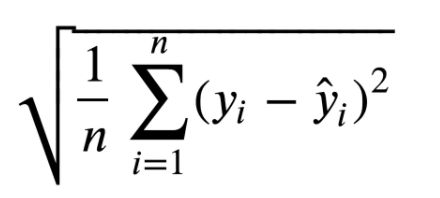

- n es la misma (404)

- - Sumatoria de los valores según la condición de: 
    - (yi (valor real) - yi prima (valor predicho) al cuadrado

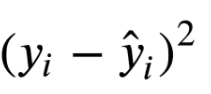

In [57]:
#usamos el mismo código para obtener la sumatoria de "(y real - y predicha) al cuadrado"
n_rmse = int (n)
numeros_sumados_rmse = 0
for i in range (0,n,1):
  numero_suma_rmse = pow((y [i]- array_predicted[i]),2) #(y real-y predicha) al cuadrado
  numeros_sumados_rmse = numeros_sumados_rmse+ numero_suma_rmse

print (numeros_sumados_rmse)

7237.8568592052425


In [105]:
#finalmente acabamos con la fórmula 
# raíz del error cuadrático medio = 'RMSE'
n_rmse = float (n)
RMSE = 1/n_rmse*(numeros_sumados_rmse)
# elevamos al 1/2 = raíz cuadrada de la variable RMSE

RMSE = pow(RMSE, 1/2)
RMSE

4.232669048633557

In [112]:
#redondeamos el resultado
round(RMSE,2)

4.23